For the sake of simplicity, I choose only features "sqft_living", "sqft_lot", "view", "condition", "grade" (they should provide qualitatively different/uncorrelated information) and run a fairly robust ML algorithm - random forest - with default parameters to predict the price. 

Afterwards, I evaluate it using easily interpretable scores (such as 'explained variance' or 'mean absolute percentage error') based on the cross validation performance of the trained model. 

Obtained scores seem surprisingly good - too good? That would require further inspection. 

In [1]:
import pandas as pd

### Data loading & basic inspection

In [2]:
df = pd.read_csv(('kc_house_data.csv'))
print("number of rows:", df.shape[0])
df.sample(3)

number of rows: 21613


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6810,4222500020,20150219T000000,256400.0,3,1.5,1490,7800,1.0,0,0,...,7,1010,480,1963,0,98003,47.3431,-122.304,1570,7800
7885,5015000180,20141110T000000,713500.0,3,2.0,1720,4200,2.0,0,0,...,8,1720,0,1908,1992,98112,47.6285,-122.301,1720,4200
19701,2767601872,20150119T000000,657000.0,2,3.0,1570,1281,3.0,0,0,...,8,1570,0,2014,0,98107,47.6741,-122.384,1570,2500


In [3]:
# Here I assume that there are no missing values, however normally I'd have checked 
#   whether there aren't any 'magic values' serving the role of nulls.
df.isnull().sum(axis = 0)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


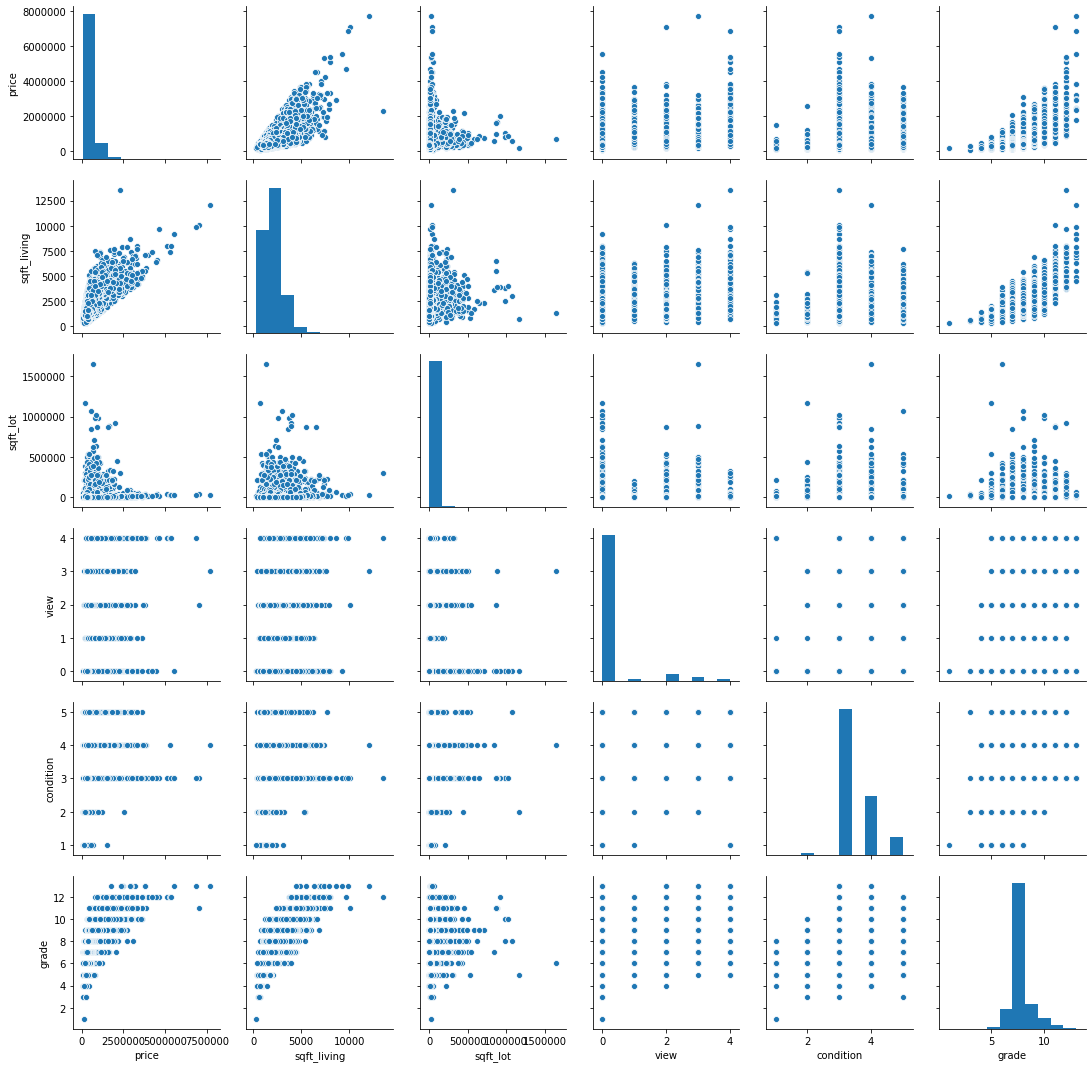

In [5]:
import seaborn as sns
COLS = ["price", "sqft_living", "sqft_lot", "view", "condition", "grade"]
sns.pairplot(df[COLS])

### Preparing train&test datasets and training basic Random Forest model

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

CV_K = 3

X, y = df[COLS], df["price"]

In [7]:
cross_val_score(RandomForestRegressor(random_state=0), 
                X, y, cv=CV_K, scoring='explained_variance')

array([0.9979231 , 0.99651622, 0.99997785])

In [8]:
cross_val_score(RandomForestRegressor(random_state=0), 
                X, y, cv=CV_K, scoring='neg_mean_absolute_percentage_error')

array([-0.0002419 , -0.00020776, -0.00015804])